# PCML Project-1 ~ Team #60

## Initial Python Imports

In [12]:
# Useful starting lines
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import datetime

from costs import compute_loss

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the training data into feature matrix, class labels, and event ids:

In [13]:
from proj1_helpers import *
from helpers import *

DATA_TRAIN_PATH = "../Data/train.csv" # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

#print the shape of the offset x matrix.
print('y shape: ',y.shape)
print('original tX shape: ',tX.shape)
print('ids shape: ',ids.shape)

y shape:  (200,)
original tX shape:  (200, 2)
ids shape:  (200,)


## Data preprocessing

### Standardization

In [14]:
#standardization
#tX, mean_x, std_x = standardize(tX, mean_x=None, std_x=None)
tX, mean_x, std_x = standardize_outliers(tX)
print('standardized tX shape: ',tX.shape)
print('tX mean shape: ',mean_x.shape)
print('tX std shape: ',std_x.shape)

200 2
(2,)
(2,)
standardized tX shape:  (200, 3)
tX mean shape:  (2,)
tX std shape:  (2,)


### Analysis of output y

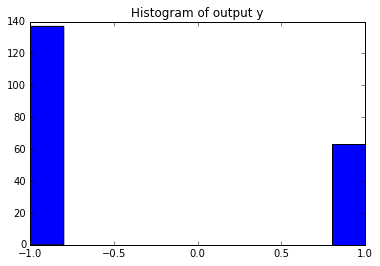

In [15]:
# Histogram of output y
plt.hist(y, bins=10, align='mid')
plt.title("Histogram of output y")
plt.show()

### Analysis of y as a function of all its features (one by one)

feature:  0


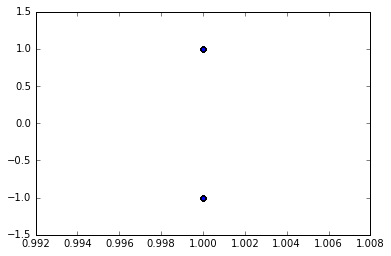

feature:  1


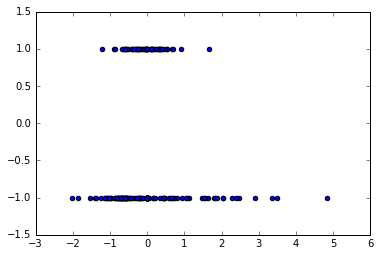

feature:  2


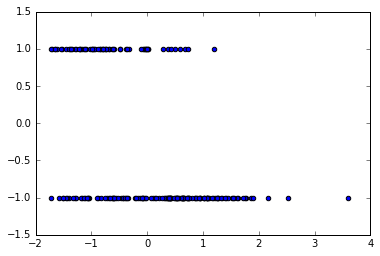

In [16]:
# Analyse y as a function of all the other features (one by one)
number_of_params = tX.shape[1]
for feature in range(tX.shape[1]):
    print('feature: ',feature)
    plt.scatter(tX[:,feature], y)
    plt.show()

## Linear regression using gradient descent

In [18]:
from gradient_descent import least_squares_GD

# Define the parameters of the algorithm.
max_iters = 1000
gamma = 0.01

# Initialization
w_initial = np.zeros(tX.shape[1])

# Start gradient descent.
# start_time = datetime.datetime.now()
gradient_losses, gradient_ws = least_squares_GD(y, tX, w_initial, gamma, max_iters)
# end_time = datetime.datetime.now()


Gradient Descent(0/999): loss=0.5
Gradient Descent(1/999): loss=0.4967971857441695
Gradient Descent(2/999): loss=0.49365857536333907
Gradient Descent(3/999): loss=0.49058287517561633
Gradient Descent(4/999): loss=0.48756881767470217
Gradient Descent(5/999): loss=0.4846151609984927
Gradient Descent(6/999): loss=0.48172068840849974
Gradient Descent(7/999): loss=0.47888420777986695
Gradient Descent(8/999): loss=0.476104551101767
Gradient Descent(9/999): loss=0.4733805739879675
Gradient Descent(10/999): loss=0.47071115519735707
Gradient Descent(11/999): loss=0.4680951961642316
Gradient Descent(12/999): loss=0.46553162053813696
Gradient Descent(13/999): loss=0.4630193737330782
Gradient Descent(14/999): loss=0.4605574224858998
Gradient Descent(15/999): loss=0.4581447544236535
Gradient Descent(16/999): loss=0.45578037763976736
Gradient Descent(17/999): loss=0.45346332027883973
Gradient Descent(18/999): loss=0.4511926301298787
Gradient Descent(19/999): loss=0.44896737422781824
Gradient Descent

## Linear regression using stochastic gradient descent

In [19]:
from stochastic_gradient_descent import least_squares_SGD

# Define the parameters of the algorithm.
max_iters = 1000
gamma = 0.01
batch_size = 50

# Initialization
w_initial = np.zeros(tX.shape[1])

# Start SGD.
# start_time = datetime.datetime.now()
stoch_gradient_losses, stoch_gradient_ws = least_squares_SGD(y, tX, w_initial, batch_size, gamma, max_iters)
# end_time = datetime.datetime.now()

Stochastic Gradient Descent(0/999): loss=0.5
Stochastic Gradient Descent(1/999): loss=0.4968060143214086
Stochastic Gradient Descent(2/999): loss=0.49364606013191575
Stochastic Gradient Descent(3/999): loss=0.49028466049458636
parameters w:  [-0.01458463 -0.00108089 -0.01695087]


In [20]:
i = 0
min_loss = 100
min_i = -1
for l in stoch_gradient_losses:
    if l < min_loss:
        min_loss = l
        min_i = i
    i = i+1
    print(l)

print()
print('min loss: ',min_loss)
print('min index: ',min_i)

0.5
0.496806014321
0.493646060132
0.490284660495

min loss:  0.490284660495
min index:  3


## Least squares regression using normal equations

In [21]:
from least_squares import least_squares

# start_ls_time = datetime.datetime.now()
ls_wopt, ls_loss = least_squares(y,tX)
# end_ls_time = datetime.datetime.now()
print('loss=',ls_loss)
print('parameters w: ',ls_wopt)

loss= 0.339206179047
parameters w:  [-0.37        0.02307041 -0.43172776]


## Ridge regression using normal equations

In [22]:
from ridge_regression import ridge_regression

# lambdas = np.logspace(-3, 1, 10)      
# φ_x = build_poly(x, degree)
# x_train, x_test, y_train, y_test = split_data(tX, y, ratio, seed)
    
#     for lamb in lambdas:

w_ridge = ridge_regression(y, tX, 0.01)
err = compute_loss(y, tX, w_ridge)

print('loss: ',err)
print('parameters w: ',w_ridge)

# rmse_tr = np.sqrt(2*compute_loss(y, tX, w_ridge))
# rmse_te = np.sqrt(2*compute_loss(y, tX, w_ridge))


loss:  0.339269396639
parameters w:  [-0.3627451   0.02142596 -0.42308929]


## Logistic regression using gradient descent or SGD

In [23]:
from helpers import de_standardize
from logistic_regression import learning_by_gradient_descent, calculate_loss
from plots import visualization

def logistic_regression_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 30820
    threshold = 1e-8
    gamma = 0.000000001
    losses = []

    # build tx
    tx = x
    w = np.zeros((tx.shape[1], 1))
    
    print('tx: ',tx.shape)
    print('w: ',w.shape)
    print('y: ',y.shape)

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_gradient_descent(y, tx, w, gamma)
        # log info
        if iter % 1000 == 0:
            print("Current iteration={i}, the loss={l}".format(i=iter, l=loss))
        # converge criteria
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    print("The loss={l}".format(l=calculate_loss(y, tx, w)))

logistic_regression_gradient_descent_demo(y, tX)

tx:  (200, 3)
w:  (3, 1)
y:  (200,)
Current iteration=0, the loss=138.62943611198904
Current iteration=1000, the loss=134.55691603880524
Current iteration=2000, the loss=130.48460243164908
Current iteration=3000, the loss=126.41249527991309
Current iteration=4000, the loss=122.34059457298201
Current iteration=5000, the loss=118.26890030023303
Current iteration=6000, the loss=114.1974124510356
Current iteration=7000, the loss=110.12613101475159
Current iteration=8000, the loss=106.05505598073526
Current iteration=9000, the loss=101.9841873383332
Current iteration=10000, the loss=97.91352507688447
Current iteration=11000, the loss=93.84306918572025
Current iteration=12000, the loss=89.7728196541645
Current iteration=13000, the loss=85.70277647153313
Current iteration=14000, the loss=81.63293962713472
Current iteration=15000, the loss=77.56330911027027
Current iteration=16000, the loss=73.49388491023305
Current iteration=17000, the loss=69.42466701630856
Current iteration=18000, the loss=

## Regularized logistic regression using gradient descent or SGD

## Full testing

In [38]:
from test import *

# test_GD(y, tX, 0.1)
# test_SGD(y, tX, 0.1)
test_LS(y, tX, 0.1)
test_RR(y, tX, 0.1)
# test_LR(y, tX, 0.1)
# test_RLR(y, tX, 0.1)

0.683333333333
0.683333333333


## Generate predictions and save ouput in csv format for submission:

In [ ]:
DATA_TEST_PATH = "../Data/test.csv" # TODO: download test data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [ ]:
OUTPUT_PATH = '' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, tX_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)